In [1]:
%cd ".."

/home/ensai/projet-statistique-2022


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import euclidean_distances
import scipy.spatial as sp

from gensim import models


from reduction_dim.correlation_matrix import *
from doc_embedding.moyenne import word_emb_vers_doc_emb_moyenne

# Read Doc Embedding

In [3]:
#fichier sous la forme d'un dataframe
cbow_model = models.KeyedVectors.load_word2vec_format('data/tunning/cbow.kv')
data = pd.DataFrame(cbow_model.vectors,index=cbow_model.index_to_key)

with open("data/docs.json") as file:
    docs = json.load(file)
moy_embedding_tfidf = word_emb_vers_doc_emb_moyenne(docs=docs, modele=cbow_model, methode = 'TF-IDF')

In [4]:
moy_embedding_tfidf = np.array(moy_embedding_tfidf)
moy_embedding_tfidf.shape

(9501, 5)

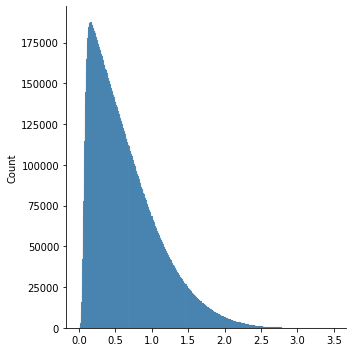

In [5]:
initial_distance = euclidean_distances(moy_embedding_tfidf)
#Visualise la distribution pour avoir une idée du epsilon qu'on va fixer ou du nombre voisin k
sns.displot(sp.distance.squareform(initial_distance, force="tovector", checks=False))

# Compare with TSNE distance

In [6]:
tsne = TSNE(n_components=2) 
coord = tsne.fit_transform(moy_embedding_tfidf)
tsne_distance = euclidean_distances(coord)

/home/ensai/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/ensai/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Exemple utilisation (j'ai mis des valeurs de epsilon et k au hasard)

In [7]:
#epsilon=np.inf, on peut comparer toutes les distances
correlation_epsilon(initial_distance=initial_distance,new_distance=tsne_distance,epsilon=np.inf)

0.41404903735898735

In [10]:
correlation_epsilon(initial_distance=initial_distance,new_distance=tsne_distance,epsilon=0.5)

0.8065632862999109

In [11]:
correlation_neighboor(initial_distance=initial_distance,new_distance=tsne_distance,k=10)

0.36583986391098294